In [7]:
import pickle
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.dates as mdates
import h5py
from datetime import datetime, date, timedelta

../DataBase/PAM_pickle/Keelung/2023/Keelung_041712-050311-5min.pkl
../DataBase/PAM_pickle/Keelung/2023/Keelung_060909-062522-5min.pkl
../DataBase/PAM_pickle/Keelung/2023/Keelung_082912-091404-5min.pkl
../DataBase/PAM_pickle/Keelung/2023/Keelung_121508-010612-5min.pkl
finished


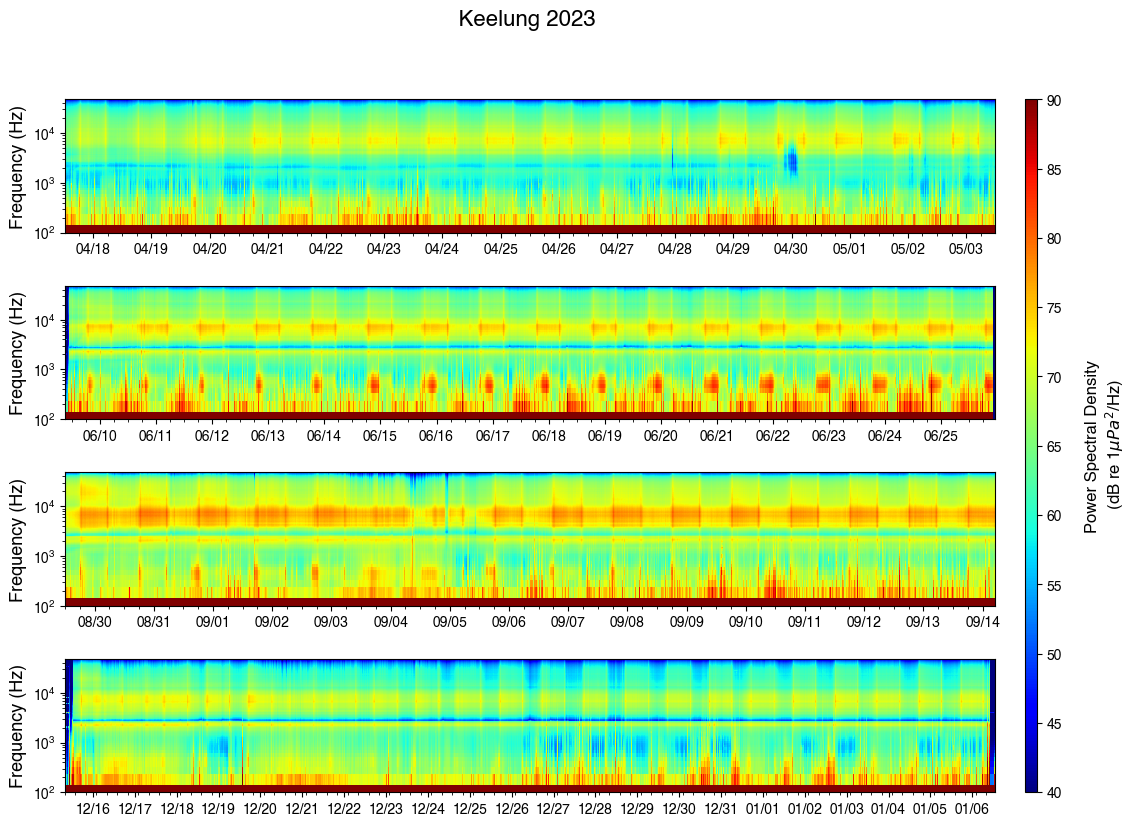

In [11]:

fig, ax = plt.subplots(4, 1, figsize=(12, 9))
plt.rcParams["font.family"] = "Helvetica"
plt.subplots_adjust(hspace=0.4)

vmin = 40; vmax = 90
from matplotlib import cm
cmap = cm.jet
place = 'Keelung'
year = 2023
log = True

for i, pklpath in enumerate(sorted(glob.glob(f'../DataBase/PAM_pickle/{place}/{year}/*.pkl'))):
    print(pklpath)
    file = open(pklpath, 'rb')
    array = pickle.load(file)
    freq = array['freq']
    file.close()
    alldate = array['time']
    newarray = array['50pct']
    
    # if '060808' in pklpath: 
    #     base = datetime(2023, 6, 8, 8, 5, 0)
    #     minute=30
    #     alldate = [base + timedelta(minutes = x*minute) for x in range(int(60/minute)*(374))]
    # print(newarray.shape)
    # print(len(alldate))
    #========================================================
    if log:
        ax1 = ax[i].pcolormesh(alldate, np.array(freq), newarray, cmap=cmap, vmin=vmin, vmax=vmax)
        ax[i].set_yscale('log')
        ax[i].set_ylabel('Frequency (Hz)', fontsize=13)
        ax[i].set_ylim(10**2,max(freq))
    else:
        ax1 = ax[i].pcolormesh(alldate, np.array(freq)/1000, newarray, cmap=cmap, vmin=vmin, vmax=vmax)
        ax[i].set_ylabel('Frequency (kHz)', fontsize=13)
        ax[i].set_ylim(1, 25)
        
    ax[i].xaxis.set_major_locator(mdates.DayLocator(interval=1))   #to get a tick every 15 minutes
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))     #optional formatting 
    ax[i].xaxis.set_minor_locator(mdates.HourLocator(interval=6))   #to get a tick every 15 minutes
    # if i == 0:
    #     ax[i].set_title('2023 04', fontsize=12)
    # else:
    #     ax[i].set_title('2023 06', fontsize=12)
plt.suptitle(f'    {place} {year}', fontsize=16)

cax = fig.add_axes([ax[0].get_position().x1+0.025, ax[3].get_position().y0, 0.01, ax[0].get_position().y1-ax[3].get_position().y0, ])
cbar = plt.colorbar(ax1, cax=cax, cmap=cmap, pad=0.2 )
cbar.set_label('\nPower Spectral Density\n (dB re 1'r'$\mu Pa^2$/Hz)', fontsize=12)
cbar.set_ticks(range(vmin,vmax+1,5))

savepath = '/Users/tong/Documents/09_IONTU/ForCF/海保署報告/Figure'
plt.savefig(f'{savepath}/{place}_{year}_spectrogram_50pct_5sp.pdf')
plt.savefig(f'{savepath}/{place}_{year}_spectrogram_50pct_5sp.png',dpi=500, bbox_inches='tight')

print('finished')

In [156]:
dsun = pd.read_csv('../DataBase/Data_CWA/sunset_time_keelung2023.csv')

In [157]:
dsun.head()

,TIME,SUNRSET,SUNSET
0,2023-04-01,5:45,18:09
1,2023-04-02,5:44,18:10
2,2023-04-03,5:43,18:10
3,2023-04-04,5:42,18:10
4,2023-04-05,5:41,18:11


../DataBase/PAM_pickle\Keelung_041713-050310-30min.pkl


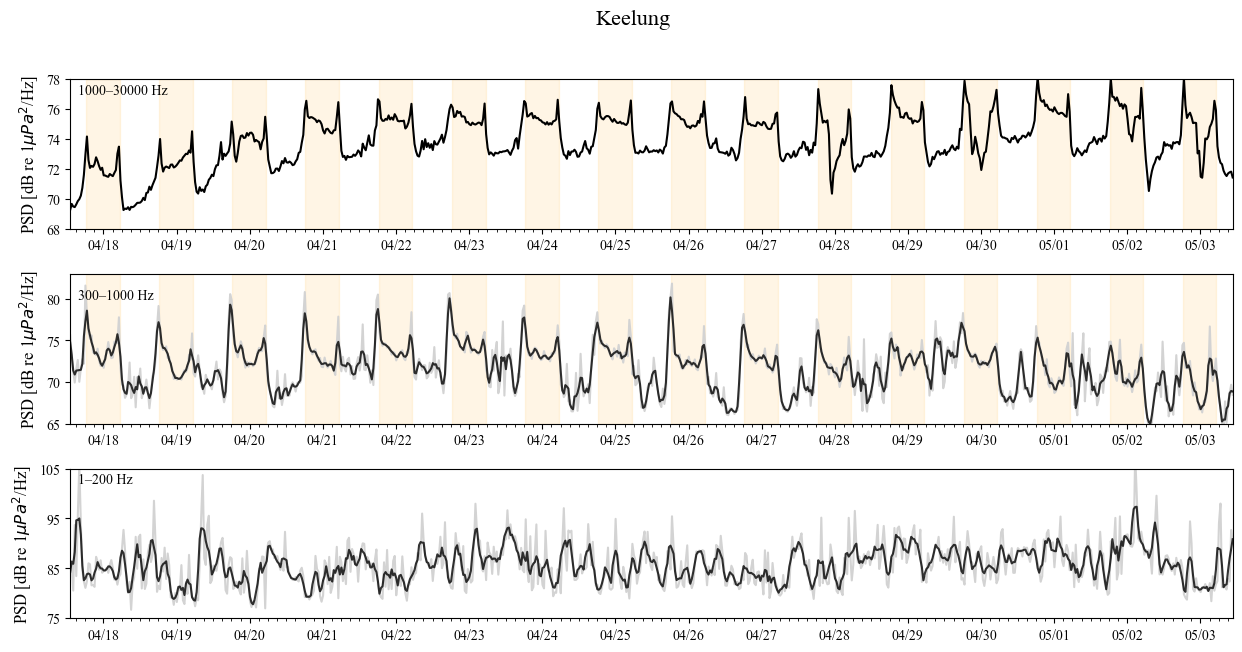

In [160]:
from scipy.signal import savgol_filter
place = 'Keelung'
for i, pklpath in enumerate(glob.glob(f'../DataBase/PAM_pickle/{place}_0417*-30min.pkl')):
    print(pklpath)
    file = open(pklpath, 'rb')
    array = pickle.load(file)
    freq = array['freq']
    file.close()
    alldate = array['time']
    newarray = array['50pct']

fig, ax = plt.subplots(3,1 ,figsize=(15,7))
plt.subplots_adjust(hspace=0.3)
ymin = 68
ymax = 78
freqmin = 1000
freqmax = 30000

# for day in range(8,30,1):
#     if day == 31:
#         day = 1; month = 5
#     else:
#         month = 6
#     if day != 30:
#         ax[0].fill_betweenx(y=[ymin,ymax], x1=datetime(2023, month,day,18,45), x2=datetime(2023,month,day+1,5,5), color='orange', alpha=0.1)
#     else:
#         ax[0].fill_betweenx(y=[ymin,ymax], x1=datetime(2023, month,day,18,45), x2=datetime(2023,5,1,5,5), color='orange', alpha=0.1)
for day in range(14,31,1):
    month = 4

    if day != 30:
        sunset = int((dsun['SUNSET'][dsun['TIME']==f'2023-{str(month).zfill(2)}-{str(day).zfill(2)}'].values[0]).rsplit(':')[-1])
        sunrset = int((dsun['SUNRSET'][dsun['TIME']==f'2023-{str(month).zfill(2)}-{str(day+1).zfill(2)}'].values[0]).rsplit(':')[-1])
        ax[0].fill_betweenx(y=[ymin,ymax], x1=datetime(2023, month,day,18,sunset), x2=datetime(2023,month,day+1,5,sunrset), color='orange', alpha=0.1)
    else:
        sunset = int((dsun['SUNSET'][dsun['TIME']==f'2023-{str(month).zfill(2)}-{str(day).zfill(2)}'].values[0]).rsplit(':')[-1])
        sunrset = int((dsun['SUNRSET'][dsun['TIME']==f'2023-05-01'].values[0]).rsplit(':')[-1])
        ax[0].fill_betweenx(y=[ymin,ymax], x1=datetime(2023,month,day,18,sunset), x2=datetime(2023, int(month)+1,1,5,sunrset), color='orange', alpha=0.1)
for day in range(1,4,1):
    month = 5
    sunset = int((dsun['SUNSET'][dsun['TIME']==f'2023-{str(month).zfill(2)}-{str(day).zfill(2)}'].values[0]).rsplit(':')[-1])
    sunrset = int((dsun['SUNRSET'][dsun['TIME']==f'2023-{str(month).zfill(2)}-{str(day+1).zfill(2)}'].values[0]).rsplit(':')[-1])
    ax[0].fill_betweenx(y=[ymin,ymax], x1=datetime(2023, month,day,18,sunset), x2=datetime(2023,month,day+1,5,sunrset), color='orange', alpha=0.1)

        
ax[0].plot(alldate,np.max(newarray[freqmin:freqmax, :], axis=0), 'k')
ax[0].set_xlim(alldate[0], alldate[-1])
ax[0].set_ylim(ymin,ymax)
ax[0].set_yticks(range(ymin,ymax+1,2))
ax[0].set_ylabel('PSD [dB re 1'r'$\mu Pa^2$/Hz]', fontsize=12)
ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=1))   #to get a tick every 15 minutes
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))     #optional formatting 
ax[0].xaxis.set_minor_locator(mdates.HourLocator(interval=3))   #to get a tick every 15 minutes
ax[0].text(alldate[5], ymax-1, f'{freqmin}–{freqmax} Hz', ha='left', fontsize=10)
#========================
ymin = 65
ymax = 83
freqmin = 300
freqmax = 1000
# for day in range(8,30,1):
#     if day == 31:
#         day = 1; month = 5
#     else:
#         month = 6
#     if day != 30:
#         ax[1].fill_betweenx(y=[ymin,ymax], x1=datetime(2023, month,day,18,45), x2=datetime(2023,month,day+1,5,5), color='orange', alpha=0.1)
#     else:
#         ax[1].fill_betweenx(y=[ymin,ymax], x1=datetime(2023, month,day,18,45), x2=datetime(2023,5,1,5,5), color='orange', alpha=0.1)

for day in range(14,31,1):
    month = 4
    if day != 30:
        sunset = int((dsun['SUNSET'][dsun['TIME']==f'2023-{str(month).zfill(2)}-{str(day).zfill(2)}'].values[0]).rsplit(':')[-1])
        sunrset = int((dsun['SUNRSET'][dsun['TIME']==f'2023-{str(month).zfill(2)}-{str(day+1).zfill(2)}'].values[0]).rsplit(':')[-1])
        ax[1].fill_betweenx(y=[ymin,ymax], x1=datetime(2023, month,day,18,sunset), x2=datetime(2023,month,day+1,5,sunrset), color='orange', alpha=0.1)
    else:
        sunset = int((dsun['SUNSET'][dsun['TIME']==f'2023-{str(month).zfill(2)}-{str(day).zfill(2)}'].values[0]).rsplit(':')[-1])
        sunrset = int((dsun['SUNRSET'][dsun['TIME']==f'2023-05-01'].values[0]).rsplit(':')[-1])
        ax[1].fill_betweenx(y=[ymin,ymax], x1=datetime(2023, month,day,18,sunset), x2=datetime(2023,5,1,5,sunrset), color='orange', alpha=0.1)

for day in range(1,4,1):
    month = 5
    sunset = int((dsun['SUNSET'][dsun['TIME']==f'2023-{str(month).zfill(2)}-{str(day).zfill(2)}'].values[0]).rsplit(':')[-1])
    sunrset = int((dsun['SUNRSET'][dsun['TIME']==f'2023-{str(month).zfill(2)}-{str(day+1).zfill(2)}'].values[0]).rsplit(':')[-1])
    ax[1].fill_betweenx(y=[ymin,ymax], x1=datetime(2023, month,day,18,sunset), x2=datetime(2023,month,day+1,5,sunrset), color='orange', alpha=0.1)

ax[1].plot(alldate,np.max(newarray[freqmin:freqmax, :], axis=0), 'lightgrey')
ax[1].plot(alldate,savgol_filter(np.max(newarray[freqmin:freqmax, :], axis=0), window_length=3, polyorder=1, mode='nearest'),'k', alpha=0.8)
ax[1].set_xlim(alldate[0], alldate[-1])
ax[1].set_ylim(ymin,ymax)
ax[1].set_yticks(range(ymin,ymax+1,5))
ax[1].set_ylabel('PSD [dB re 1'r'$\mu Pa^2$/Hz]', fontsize=12)
ax[1].xaxis.set_major_locator(mdates.DayLocator(interval=1))   #to get a tick every 15 minutes
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))     #optional formatting 
ax[1].xaxis.set_minor_locator(mdates.HourLocator(interval=3))   #to get a tick every 15 minutes
ax[1].text(alldate[5], ymax-3, f'{freqmin}–{freqmax} Hz', ha='left', fontsize=10)
#==============
ymin = 75  
ymax = 105
freqmin = 1
freqmax = 200
# for day in range(8,25,1):
#     plt.fill_betweenx(y=[95,140], x1=datetime(2023,6,day,5,3), x2=datetime(2023,6,day,18,40), color='lightblue', alpha=0.15)
ax[2].plot(alldate,np.max(newarray[freqmin:freqmax, :], axis=0), 'lightgrey')
ax[2].plot(alldate,savgol_filter(np.max(newarray[freqmin:freqmax, :], axis=0), window_length=4, polyorder=1, mode='nearest'),'k', alpha=0.8)
ax[2].set_xlim(alldate[0], alldate[-1])
ax[2].set_yticks(range(ymin, ymax+1,10))
ax[2].set_ylim(ymin, ymax)
ax[2].set_ylabel('PSD [dB re 1'r'$\mu Pa^2$/Hz]', fontsize=12)
ax[2].xaxis.set_major_locator(mdates.DayLocator(interval=1))   #to get a tick every 15 minutes
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))     #optional formatting 
ax[2].xaxis.set_minor_locator(mdates.HourLocator(interval=3))   #to get a tick every 15 minutes
ax[2].text(alldate[5], ymax-3, f'{freqmin}–{freqmax} Hz', ha='left', fontsize=10)

plt.suptitle(place, fontsize=16)
plt.savefig(f'../Results/{place}_pattern_202304.pdf')
plt.savefig(f'../Results/{place}_pattern_202304.png', dpi=300)

In [66]:
day

30